In [1]:
import os
import pandas as pd
import geopandas as gpd

# Procesamiento de Datos
El presente procedimiento muestra como hacer la carga de AGEBs y Censo para el año 2000, 2010, 2020, así como recuperar la información correspondiente a Guadalajara (CVE_ENT = 14, CVE_MUN = 039)

In [2]:
# Dirección de los datos Raw
path_data = "../../Sample_Data/Raw/"

In [3]:
PLACE = {"NOM_MUN": "Guadalajara",
         "CVE_ENT": "14",
         "CVE_MUN": "039"
         }

In [4]:
cols = ["CVEGEO", "POBTOT", "geometry"]

## 2000

In [5]:
# Carga de AGEBs 2000
agebs_2000_path = path_data + "agebs_2000/NACIONAL/N_Agebs_0000_01.shp"
agebs_2000  = gpd.read_file(agebs_2000_path)

In [6]:
agebs_2000_backup = agebs_2000.copy()

In [7]:
agebs_2000 = agebs_2000_backup.copy()

In [8]:
agebs_2000['CVE_MUN'] = agebs_2000['CVE_MUN'].str[2:]
agebs_2000['CVE_AGEB'] = agebs_2000['CVE_AGEB'].str.replace('-', '')
agebs_2000.rename(columns = {"CVE_EDO":"CVE_ENT","CVE_AGEB": "CVEGEO", "Z1": "POBTOT"}, inplace = True)

In [11]:
mpios_en_metropoli = gpd.read_file(path_data+"metropoli/mpios_en_metropoli.shp")

In [12]:
zona_metropolitana = mpios_en_metropoli[mpios_en_metropoli.NOMGEO_COR == "Guadalajara"].copy()
zona_metropolitana['CVE_ENT'] = zona_metropolitana['CVEGEO'].str[:2]
zona_metropolitana['CVE_MUN'] = zona_metropolitana['CVEGEO'].str[2:5]
zona_metropolitana = zona_metropolitana[["CVE_ENT","CVE_MUN"]]
zona_metropolitana

,CVE_ENT,CVE_MUN
93,14,039
95,14,051
99,14,070
100,14,097
101,14,098
102,14,101
103,14,120


In [16]:
resultado = pd.merge(zona_metropolitana, agebs_2000, on=['CVE_ENT', 'CVE_MUN'], how='inner')
resultado = gpd.GeoDataFrame(resultado, geometry='geometry')
resultado.crs = agebs_2000.crs
resultado

,CVE_ENT,CVE_MUN,CVE_LOC,CVEGEO,AGEB,NOM_EDO,ABRE_EDO,NOM_MUN,NOM_LOC,POBTOT,...,I6,I7,I8,I9,I10,I11,INDICE,GRADO,GM,geometry
0,14,039,140390001,1403900013001,300-1,JALISCO,JAL,GUADALAJARA,GUADALAJARA,1121.0,...,24.52,18.27,19.71,30.77,50.12,7.69,0.62394,4.0,ALTO,"POLYGON ((1864704.593 746314.524, 1864709.149 ..."
1,14,039,140390001,1403900014531,453-1,JALISCO,JAL,GUADALAJARA,GUADALAJARA,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((1867570.897 742716.371, 1867549.240 ..."
2,14,039,140390001,1403900013798,379-8,JALISCO,JAL,GUADALAJARA,GUADALAJARA,6133.0,...,13.18,1.92,10.43,17.01,46.24,1.20,-1.05204,3.0,MEDIO,"POLYGON ((1865445.845 744327.542, 1865448.404 ..."
3,14,039,140390001,1403900014832,483-2,JALISCO,JAL,GUADALAJARA,GUADALAJARA,3669.0,...,0.83,0.71,2.49,3.43,27.48,0.53,-3.07743,2.0,BAJO,"POLYGON ((1865437.461 744411.117, 1865445.845 ..."
4,14,039,140390001,1403900013764,376-4,JALISCO,JAL,GUADALAJARA,GUADALAJARA,1603.0,...,5.35,5.97,11.64,19.81,47.26,0.00,-1.02893,3.0,MEDIO,"POLYGON ((1865969.476 745279.634, 1865986.305 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,14,120,141200001,1412000011691,169-1,JALISCO,JAL,ZAPOPAN,ZAPOPAN,2883.0,...,20.47,4.67,13.46,25.13,43.67,3.43,-0.92609,3.0,MEDIO,"POLYGON ((1849494.953 737184.131, 1849700.214 ..."
1258,14,120,141200001,1412000013537,353-7,JALISCO,JAL,ZAPOPAN,ZAPOPAN,1640.0,...,95.60,10.85,40.47,44.87,32.86,5.41,1.72530,5.0,MUY ALTO,"POLYGON ((1846645.054 736922.602, 1846652.527 ..."
1259,14,120,141200001,1412000014643,464-3,JALISCO,JAL,ZAPOPAN,ZAPOPAN,1476.0,...,93.24,15.54,32.09,50.00,44.81,6.59,1.56843,5.0,MUY ALTO,"POLYGON ((1847912.636 737162.451, 1847876.173 ..."
1260,14,120,141200001,1412000013611,361-1,JALISCO,JAL,ZAPOPAN,ZAPOPAN,325.0,...,98.28,15.52,44.83,44.83,31.48,23.53,2.41327,5.0,MUY ALTO,"POLYGON ((1847912.636 737162.451, 1847950.998 ..."


In [17]:
type(resultado)

geopandas.geodataframe.GeoDataFrame

In [18]:
resultado.crs

<Projected CRS: PROJCS["North_America_Lambert_Conformal_Conic",GEO ...>
Name: North_America_Lambert_Conformal_Conic
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1927 (CGQ77)
- Ellipsoid: Clarke 1866
- Prime Meridian: Greenwich

In [55]:
censo_2000_filtered = agebs_2000.loc[(agebs_2000["CVE_ENT"]== PLACE["CVE_ENT"]) & (agebs_2000["CVE_MUN"]== PLACE["CVE_MUN"])]
censo_2000_filtered.head()

,CVE_ENT,CVE_MUN,CVE_LOC,CVEGEO,AGEB,NOM_EDO,ABRE_EDO,NOM_MUN,NOM_LOC,POBTOT,...,I6,I7,I8,I9,I10,I11,INDICE,GRADO,GM,geometry
25100,14,039,140390001,1403900013001,300-1,JALISCO,JAL,GUADALAJARA,GUADALAJARA,1121.0,...,24.52,18.27,19.71,30.77,50.12,7.69,0.62394,4.0,ALTO,"POLYGON ((1864704.593 746314.524, 1864709.149 ..."
25101,14,039,140390001,1403900014531,453-1,JALISCO,JAL,GUADALAJARA,GUADALAJARA,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((1867570.897 742716.371, 1867549.240 ..."
25102,14,039,140390001,1403900013798,379-8,JALISCO,JAL,GUADALAJARA,GUADALAJARA,6133.0,...,13.18,1.92,10.43,17.01,46.24,1.20,-1.05204,3.0,MEDIO,"POLYGON ((1865445.845 744327.542, 1865448.404 ..."
25103,14,039,140390001,1403900014832,483-2,JALISCO,JAL,GUADALAJARA,GUADALAJARA,3669.0,...,0.83,0.71,2.49,3.43,27.48,0.53,-3.07743,2.0,BAJO,"POLYGON ((1865437.461 744411.117, 1865445.845 ..."
25104,14,039,140390001,1403900013764,376-4,JALISCO,JAL,GUADALAJARA,GUADALAJARA,1603.0,...,5.35,5.97,11.64,19.81,47.26,0.00,-1.02893,3.0,MEDIO,"POLYGON ((1865969.476 745279.634, 1865986.305 ..."


In [57]:
censo_2000_filtered.crs

<Projected CRS: PROJCS["North_America_Lambert_Conformal_Conic",GEO ...>
Name: North_America_Lambert_Conformal_Conic
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1927 (CGQ77)
- Ellipsoid: Clarke 1866
- Prime Meridian: Greenwich

<Axes: >

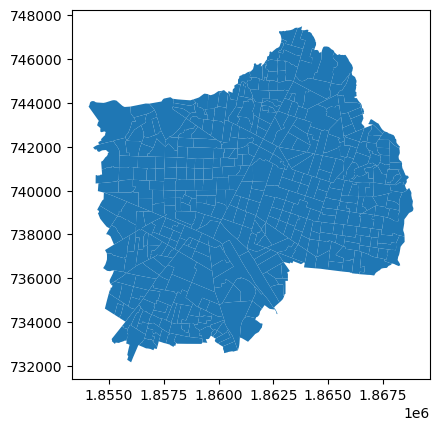

In [66]:
censo_2000_filtered.plot()

In [60]:
def load_censo_2000(agebs_2000_path):
    # Carga del censo 2000 (agebs y censo)
    agebs_2000  = gpd.read_file(agebs_2000_path)

    # Procesamiento 
    agebs_2000['CVE_MUN'] = agebs_2000['CVE_MUN'].str[2:]
    agebs_2000['CVE_AGEB'] = agebs_2000['CVE_AGEB'].str.replace('-', '')
    agebs_2000.rename(columns = {"CVE_EDO":"CVE_ENT","CVE_AGEB": "CVEGEO", "Z1": "POBTOT"}, inplace = True)
    return censo_2000

def filter_censo_2000(censo_2000, PLACE, cols):
    # Obtener datos del lugar
    NOM_MUN = PLACE["NOM_MUN"]
    CVE_ENT = PLACE["CVE_ENT"]
    CVE_MUN = PLACE["CVE_MUN"]

    # Filtrar únicamente del lugar
    censo_2000_filtered = agebs_2000.loc[(agebs_2000["CVE_ENT"]== PLACE["CVE_ENT"]) & (agebs_2000["CVE_MUN"]== PLACE["CVE_MUN"])]
    return censo_2000_filtered[cols]

## 2010

In [21]:
agebs_2010_path = path_data + "agebs_2010/AGEB_urb_2010_5.shp"
agebs_2010  = gpd.read_file(agebs_2010_path)
agebs_2010

,CODIGO,CVEGEO,GEOGRAFICO,FECHAACT,GEOMETRIA,INSTITUCIO,OID,geometry
0,LA_6052,0100100013204,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,1,"POLYGON ((2475018.434 1098724.434, 2475012.982..."
1,LA_6052,0100100013721,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,2,"POLYGON ((2475469.244 1098964.293, 2475431.454..."
2,LA_6052,0100100010657,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,3,"POLYGON ((2470787.576 1096193.647, 2470787.327..."
3,LA_6052,0100100011528,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,4,"POLYGON ((2470709.683 1097766.390, 2470705.629..."
4,LA_6052,0100100011674,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,5,"POLYGON ((2466998.954 1095069.117, 2467001.023..."
...,...,...,...,...,...,...,...,...
56190,LA_6052,3205800010087,ÁREA GEOESTADÍSTICA BÁSICA,06/2009,ÁREA,INEGI,56191,"POLYGON ((2354830.691 1056971.321, 2354952.210..."
56191,LA_6052,3205800010104,ÁREA GEOESTADÍSTICA BÁSICA,06/2009,ÁREA,INEGI,56192,"POLYGON ((2354223.827 1056675.566, 2354226.873..."
56192,LA_6052,320580001002A,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,56193,"POLYGON ((2355534.722 1055984.929, 2355492.289..."
56193,LA_6052,3205800010015,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,56194,"POLYGON ((2354810.141 1055588.501, 2354804.730..."


In [24]:
agebs_2010['CVE_ENT'] = agebs_2010['CVEGEO'].str[:2]
agebs_2010['CVE_MUN'] = agebs_2010['CVEGEO'].str[2:5]
agebs_2010

,CODIGO,CVEGEO,GEOGRAFICO,FECHAACT,GEOMETRIA,INSTITUCIO,OID,geometry,CVE_ENT,CVE_MUN
0,LA_6052,0100100013204,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,1,"POLYGON ((2475018.434 1098724.434, 2475012.982...",01,001
1,LA_6052,0100100013721,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,2,"POLYGON ((2475469.244 1098964.293, 2475431.454...",01,001
2,LA_6052,0100100010657,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,3,"POLYGON ((2470787.576 1096193.647, 2470787.327...",01,001
3,LA_6052,0100100011528,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,4,"POLYGON ((2470709.683 1097766.390, 2470705.629...",01,001
4,LA_6052,0100100011674,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,5,"POLYGON ((2466998.954 1095069.117, 2467001.023...",01,001
...,...,...,...,...,...,...,...,...,...,...
56190,LA_6052,3205800010087,ÁREA GEOESTADÍSTICA BÁSICA,06/2009,ÁREA,INEGI,56191,"POLYGON ((2354830.691 1056971.321, 2354952.210...",32,058
56191,LA_6052,3205800010104,ÁREA GEOESTADÍSTICA BÁSICA,06/2009,ÁREA,INEGI,56192,"POLYGON ((2354223.827 1056675.566, 2354226.873...",32,058
56192,LA_6052,320580001002A,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,56193,"POLYGON ((2355534.722 1055984.929, 2355492.289...",32,058
56193,LA_6052,3205800010015,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,56194,"POLYGON ((2354810.141 1055588.501, 2354804.730...",32,058


In [29]:
censo_2010_path = path_data + "censo_2010/"
xls_files = [file for file in os.listdir(censo_2010_path) if file.endswith(".csv")]
print(xls_files)
censo_2010 = pd.DataFrame()

for xls_file in xls_files:
    file_path = os.path.join(censo_2010_path, xls_file)
    temp_df = pd.read_csv(file_path)
    censo_2010 = pd.concat([censo_2010, temp_df], ignore_index=True)

['RESAGEBURB_25XLS10.csv', 'RESAGEBURB_26XLS10_1.csv', 'RESAGEBURB_26XLS10_2.csv', 'RESAGEBURB_14XLS10_2.csv', 'RESAGEBURB_19XLS10_1.csv', 'RESAGEBURB_14XLS10_1.csv', 'RESAGEBURB_19XLS10_2.csv', 'RESAGEBURB_22XLS10.csv', 'RESAGEBURB_31XLS10.csv']


In [62]:
# Asegurarse de que las columnas tengan el formato deseado
censo_2010['ENTIDAD'] = censo_2010['ENTIDAD'].apply(lambda x: f'{x:02d}')
censo_2010['MUN'] = censo_2010['MUN'].apply(lambda x: f'{x:03d}')
censo_2010['LOC'] = censo_2010['LOC'].apply(lambda x: f'{x:04d}')

# Concatenar las columnas en una sola columna "CVEGEO"
censo_2010['CVEGEO'] = censo_2010['ENTIDAD'] + censo_2010['MUN'] + censo_2010['LOC'] + censo_2010['AGEB']

In [72]:
censo_2010_cleaned = censo_2010[censo_2010["NOM_LOC"]=="Total AGEB urbana"][["CVEGEO", "POBTOT"]]
censo_2010_cleaned

,CVEGEO,POBTOT
3,2500100010012,1149
36,2500100010027,2245
86,2500100010031,2469
119,2500100010046,1732
152,2500100010050,2456
...,...,...
313193,3110500010046,1464
313233,3110500010065,5
313237,3110600010043,998
313284,3110600010058,815


In [67]:
agebs_2010_filtered = agebs_2010.loc[(agebs_2010["CVE_ENT"]== PLACE["CVE_ENT"]) & (agebs_2010["CVE_MUN"]== PLACE["CVE_MUN"])]
agebs_2010_filtered.head()

,CODIGO,CVEGEO,GEOGRAFICO,FECHAACT,GEOMETRIA,INSTITUCIO,OID,geometry,CVE_ENT,CVE_MUN
20950,LA_6052,1403900014777,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,20951,"POLYGON ((2358025.779 967996.371, 2358116.941 ...",14,039
20951,LA_6052,1403900015046,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,20952,"POLYGON ((2368384.184 964833.210, 2368410.160 ...",14,039
20952,LA_6052,1403900014508,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,20953,"POLYGON ((2360600.994 968262.600, 2360596.792 ...",14,039
20953,LA_6052,1403900013942,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,20954,"POLYGON ((2361426.862 969073.558, 2361428.009 ...",14,039
20954,LA_6052,1403900014071,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,20955,"POLYGON ((2359067.646 968067.852, 2359087.428 ...",14,039


In [69]:
agebs_2010_filtered.shape

(442, 10)

<Axes: >

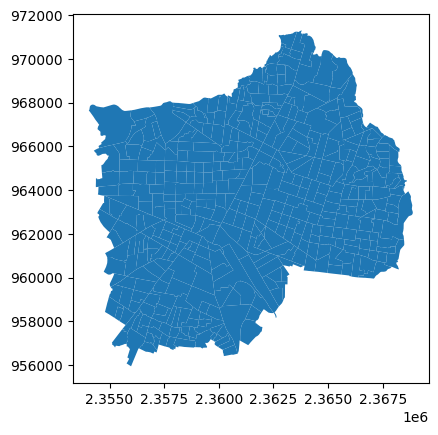

In [70]:
agebs_2010_filtered.plot()

In [73]:
censo_2010_filtered = agebs_2010_filtered.merge(censo_2010_cleaned, on='CVEGEO', how='left')
censo_2010_filtered = censo_2010_filtered[cols]
censo_2010_filtered.head()

,CVEGEO,POBTOT,geometry
0,1403900014777,2798,"POLYGON ((2358025.779 967996.371, 2358116.941 ..."
1,1403900015046,4549,"POLYGON ((2368384.184 964833.210, 2368410.160 ..."
2,1403900014508,2683,"POLYGON ((2360600.994 968262.600, 2360596.792 ..."
3,1403900013942,3527,"POLYGON ((2361426.862 969073.558, 2361428.009 ..."
4,1403900014071,2393,"POLYGON ((2359067.646 968067.852, 2359087.428 ..."


<Axes: >

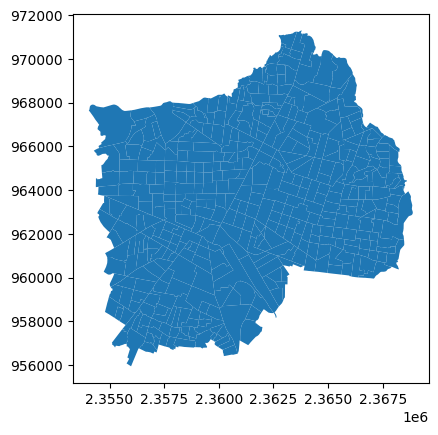

In [74]:
censo_2010_filtered.plot()

In [76]:
censo_2010_filtered.shape

(442, 3)

In [77]:
censo_2010_filtered.isnull().sum()

CVEGEO      0
POBTOT      0
geometry    0
dtype: int64

In [79]:
censo_2010_filtered.crs

<Bound CRS: PROJCS["North_America_Lambert_Conformal_Conic_ITRF ...>
Name: North_America_Lambert_Conformal_Conic_ITRF_1992
Axis Info [cartesian]:
- [east]: Easting (Meter)
- [north]: Northing (Meter)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from ITRF_1992 to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: International Terrestrial Reference Frame 1992
- Ellipsoid: GRS_1980
- Prime Meridian: Greenwich
Source CRS: North_America_Lambert_Conformal_Conic_ITRF_1992

In [85]:
def load_agebs_2000(agebs_2010_path):
    # Leer las AGEBs
    agebs_2010  = gpd.read_file(agebs_2010_path)

    # Procesamiento de AGEBs
    agebs_2010['CVE_ENT'] = agebs_2010['CVEGEO'].str[:2]
    agebs_2010['CVE_MUN'] = agebs_2010['CVEGEO'].str[2:5]
    return agebs_2010


def load_censo_2000(censo_2010_path):
    # Encuentra todos los csv en un folder 
    xls_files = [file for file in os.listdir(censo_2010_path) if file.endswith(".csv")]

    # Crea un dataframe para concatenar los archivos encontrados
    censo_2010 = pd.DataFrame()
    
    for xls_file in xls_files:
        file_path = os.path.join(censo_2010_path, xls_file)
        temp_df = pd.read_csv(file_path)
        censo_2010 = pd.concat([censo_2010, temp_df], ignore_index=True)

    # Asegurarse de que las columnas tengan el formato deseado
    censo_2010['ENTIDAD'] = censo_2010['ENTIDAD'].apply(lambda x: f'{x:02d}')
    censo_2010['MUN'] = censo_2010['MUN'].apply(lambda x: f'{x:03d}')
    censo_2010['LOC'] = censo_2010['LOC'].apply(lambda x: f'{x:04d}')
    
    # Concatenar las columnas en una sola columna "CVEGEO"
    censo_2010['CVEGEO'] = censo_2010['ENTIDAD'] + censo_2010['MUN'] + censo_2010['LOC'] + censo_2010['AGEB']

    # Seleccionar filas apropiadas y columnas a usar 
    censo_2010_cleaned = censo_2010[censo_2010["NOM_LOC"]=="Total AGEB urbana"][["CVEGEO", "POBTOT"]]
    return censo_2010_cleaned

def filter_censo_2000(agebs_2010, censo_2010, PLACE, cols):
    # Obtener datos del lugar
    NOM_MUN = PLACE["NOM_MUN"]
    CVE_ENT = PLACE["CVE_ENT"]
    CVE_MUN = PLACE["CVE_MUN"]

    # Filtrar únicamente del lugar
    agebs_2010_filtered = agebs_2010.loc[(agebs_2010["CVE_ENT"]== PLACE["CVE_ENT"]) & (agebs_2010["CVE_MUN"]== PLACE["CVE_MUN"])]
    censo_2010_filtered = agebs_2010_filtered.merge(censo_2010_cleaned, on='CVEGEO', how='left')
    censo_2010_filtered = censo_2010_filtered[cols]
    return censo_2010_filtered

## 2020

In [80]:
agebs_2020_path = path_data + "agebs_2020/mg_2020_integrado/conjunto_de_datos/00a.shp"
agebs_2020  = gpd.read_file(agebs_2020_path)

In [81]:
agebs_2020.head()

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,Ambito,geometry
0,010060001009A,01,006,0001,009A,Urbana,"POLYGON ((2471856.117 1124829.239, 2471859.442..."
1,0100600010244,01,006,0001,0244,Urbana,"POLYGON ((2472405.057 1126442.149, 2472346.028..."
2,0100600010140,01,006,0001,0140,Urbana,"POLYGON ((2470824.629 1124721.867, 2470816.835..."
3,0100600010278,01,006,0001,0278,Urbana,"POLYGON ((2471872.403 1124426.252, 2471869.144..."
4,0100600010070,01,006,0001,0070,Urbana,"POLYGON ((2471843.929 1124789.995, 2471846.977..."


In [82]:
censo_2020_path = path_data + "censo_2020/"

csv_files = [file for file in os.listdir(censo_2020_path) if file.endswith(".csv")]

censo_2020 = pd.DataFrame()

for csv_file in csv_files:
    file_path = os.path.join(censo_2020_path, csv_file)
    temp_df = pd.read_csv(file_path)
    censo_2020 = pd.concat([censo_2020, temp_df], ignore_index=True)

In [83]:
# Asegurarse de que las columnas tengan el formato deseado
censo_2020['ENTIDAD'] = censo_2020['ENTIDAD'].apply(lambda x: f'{x:02d}')
censo_2020['MUN'] = censo_2020['MUN'].apply(lambda x: f'{x:03d}')
censo_2020['LOC'] = censo_2020['LOC'].apply(lambda x: f'{x:04d}')
censo_2020['AGEB'] = censo_2020['AGEB'].apply(lambda x: str(x).zfill(4))

# Concatenar las columnas en una sola columna "CVEGEO"
censo_2020['CVEGEO'] = censo_2020['ENTIDAD'] + censo_2020['MUN'] + censo_2020['LOC'] + censo_2020['AGEB']
censo_2020_cleaned = censo_2020[censo_2020["NOM_LOC"]=="Total AGEB urbana"][["CVEGEO", "POBTOT"]]

In [84]:
censo_2020_cleaned.head()

,CVEGEO,POBTOT
3,1400100010067,1266
41,1400100010071,2073
82,1400100010103,1112
117,1400100010118,725
142,1400100010122,1286


In [87]:
agebs_2020_filtered = agebs_2020.loc[(agebs_2020["CVE_ENT"]== PLACE["CVE_ENT"]) & (agebs_2020["CVE_MUN"]== PLACE["CVE_MUN"])  & (agebs_2020.Ambito == "Urbana")]
agebs_2020_filtered.head()

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,Ambito,geometry
23683,1403900012696,14,039,0001,2696,Urbana,"POLYGON ((2357150.791 959790.056, 2357114.481 ..."
23684,1403900014207,14,039,0001,4207,Urbana,"POLYGON ((2367389.408 966302.223, 2367366.228 ..."
23685,1403900013020,14,039,0001,3020,Urbana,"POLYGON ((2363811.145 968828.465, 2363848.423 ..."
23686,1403900014194,14,039,0001,4194,Urbana,"POLYGON ((2367420.611 966341.257, 2367273.896 ..."
23687,1403900015243,14,039,0001,5243,Urbana,"POLYGON ((2368089.648 964164.191, 2368052.176 ..."


<Axes: >

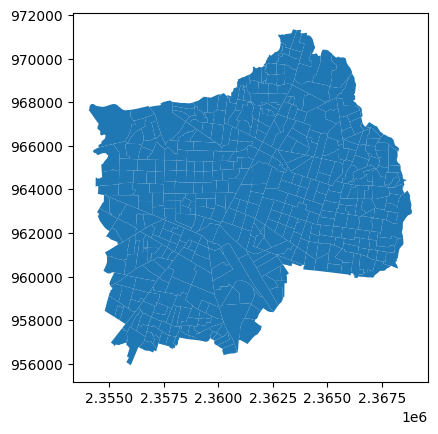

In [88]:
agebs_2020_filtered.plot()

In [89]:
agebs_2020_filtered.shape

(442, 7)

In [90]:
censo_2020_filtered = agebs_2020_filtered.merge(censo_2020_cleaned, on='CVEGEO', how='left')
censo_2020_filtered = censo_2020_filtered.rename(columns={'POBTOT': 'pobtot'}).reset_index(drop = True)
censo_2020_filtered

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,Ambito,geometry,pobtot
0,1403900012696,14,039,0001,2696,Urbana,"POLYGON ((2357150.791 959790.056, 2357114.481 ...",6406
1,1403900014207,14,039,0001,4207,Urbana,"POLYGON ((2367389.408 966302.223, 2367366.228 ...",4817
2,1403900013020,14,039,0001,3020,Urbana,"POLYGON ((2363811.145 968828.465, 2363848.423 ...",4278
3,1403900014194,14,039,0001,4194,Urbana,"POLYGON ((2367420.611 966341.257, 2367273.896 ...",3732
4,1403900015243,14,039,0001,5243,Urbana,"POLYGON ((2368089.648 964164.191, 2368052.176 ...",3622
...,...,...,...,...,...,...,...,...
437,1403900014584,14,039,0001,4584,Urbana,"POLYGON ((2355813.861 961182.720, 2355810.027 ...",2297
438,1403900010562,14,039,0001,0562,Urbana,"POLYGON ((2355181.613 966082.192, 2355197.655 ...",4180
439,1403900014508,14,039,0001,4508,Urbana,"POLYGON ((2360981.877 968647.523, 2360968.832 ...",2403
440,140390001507A,14,039,0001,507A,Urbana,"POLYGON ((2368237.002 963010.829, 2368236.612 ...",3529


In [91]:
censo_2020_filtered.isnull().sum()

CVEGEO      0
CVE_ENT     0
CVE_MUN     0
CVE_LOC     0
CVE_AGEB    0
Ambito      0
geometry    0
pobtot      0
dtype: int64

<Axes: >

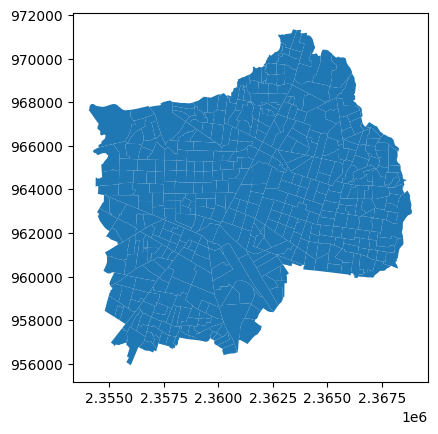

In [92]:
censo_2020_filtered.plot()

In [94]:
def load_agebs_2020(agebs_2020_path):
    agebs_2020  = gpd.read_file(agebs_2020_path)
    return agebs_2020

def load_censo_2020(censo_2020_path):
    # Encuentra todos los csv en el folder
    csv_files = [file for file in os.listdir(censo_2020_path) if file.endswith(".csv")]
    
    censo_2020 = pd.DataFrame()
    
    for csv_file in csv_files:
        file_path = os.path.join(censo_2020_path, csv_file)
        temp_df = pd.read_csv(file_path)
        censo_2020 = pd.concat([censo_2020, temp_df], ignore_index=True)

    # Asegurarse de que las columnas tengan el formato deseado
    censo_2020['ENTIDAD'] = censo_2020['ENTIDAD'].apply(lambda x: f'{x:02d}')
    censo_2020['MUN'] = censo_2020['MUN'].apply(lambda x: f'{x:03d}')
    censo_2020['LOC'] = censo_2020['LOC'].apply(lambda x: f'{x:04d}')
    censo_2020['AGEB'] = censo_2020['AGEB'].apply(lambda x: str(x).zfill(4))
    
    # Concatenar las columnas en una sola columna "CVEGEO"
    censo_2020['CVEGEO'] = censo_2020['ENTIDAD'] + censo_2020['MUN'] + censo_2020['LOC'] + censo_2020['AGEB']
    censo_2020_cleaned = censo_2020[censo_2020["NOM_LOC"]=="Total AGEB urbana"][["CVEGEO", "POBTOT"]]
    return censo_2020_cleaned

def filter_censo_2020(agebs_2020, censo_2020_cleaned, PLACE, cols):
    # Obtener datos del lugar
    NOM_MUN = PLACE["NOM_MUN"]
    CVE_ENT = PLACE["CVE_ENT"]
    CVE_MUN = PLACE["CVE_MUN"]

    agebs_2020_filtered = agebs_2020.loc[(agebs_2020["CVE_ENT"]== PLACE["CVE_ENT"]) & (agebs_2020["CVE_MUN"]== PLACE["CVE_MUN"])  & (agebs_2020.Ambito == "Urbana")]

    # Filtrar únicamente del lugar
    censo_2020_filtered = agebs_2020_filtered.merge(censo_2020_cleaned, on='CVEGEO', how='left')
    censo_2020_filtered = censo_2020_filtered.rename(columns={'POBTOT': 'pobtot'}).reset_index(drop = True)
    return censo_2020_filtered